In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.style.use('../netflix.mplstyle')
palette = {'primary': '#221f1f', 'secondary': '#b20710', 'accent': '#e50914', 'tertiary': '#f5f5f1'}

In [3]:
reviews = pd.read_csv('../data/reviews_clean.csv', index_col='review_id')
reviews.head()

,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
review_id,,,,,,,,
5704482,raeldor-96879,After Life,9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...","['1', '1']"
5704483,dosleeb,The Valhalla Murders,6.0,Icelandic detectives?,3 May 2020,0,I know Iceland is a small country and police d...,"['2', '2']"
5704493,UniqueParticle,Unstoppable,8.0,Excellent last film of legendary Director Tony...,3 May 2020,0,A suspenseful thrilling adventure about a loos...,"['3', '4']"
5704496,Hellooo1234321,Dangerous Lies,NaN,Not bad,3 May 2020,0,Highlight was Camila Mendes exceptional acting...,"['2', '3']"
5704507,indieevan,The Master,8.0,"Great Potential, Less Great Execution",3 May 2020,0,"The premise was a 10, but the execution left a...","['1', '1']"


In [4]:
titles = pd.read_csv('../data/netflix_titles_clean.csv', index_col='show_id')
titles.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
movies = titles[titles['type']=='Movie']
shows = titles[titles['type']=='TV Show']

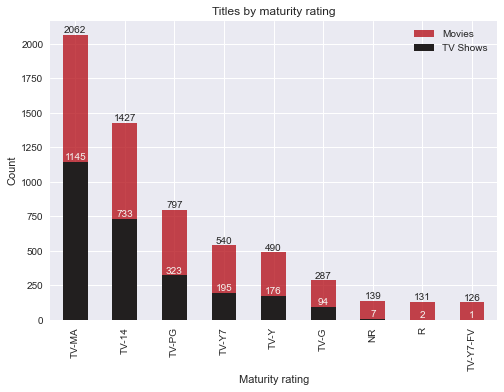

In [6]:
tv_rating_order = ('TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA')
tv_rating_meanings = ('All Children', 'Directed to Older Children', 'Directed to Older Children, Fantasy Violence', 'General Audience', 'Parental Guidance Suggested', 'Parents Strongly Cautioned', 'Mature Audience Only')

fig, ax = plt.subplots()
movies['rating'].value_counts().plot(kind='bar', ax=ax, alpha=0.75, color=palette['secondary'], label='Movies')
shows['rating'].value_counts().plot(kind='bar', ax=ax, label='TV Shows')

ax.set_title('Titles by maturity rating')
ax.set_xlabel('Maturity rating')
ax.set_ylabel('Count')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1], color=palette['tertiary'])

ax.legend()

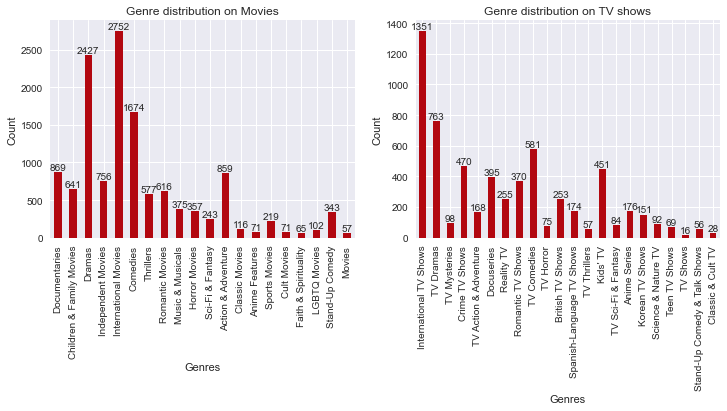

In [21]:
genre_count_tv = dict()
genre_count_movie = dict()

for _, value in movies['listed_in'].iteritems():
    for genre in value.split(', '):
        genre_count_movie[genre] = genre_count_movie.get(genre, 0) + 1

for _, value in shows['listed_in'].iteritems():
    for genre in value.split(', '):
        genre_count_tv[genre] = genre_count_tv.get(genre, 0) + 1

genre_tv = pd.Series(genre_count_tv)
genre_movie = pd.Series(genre_count_movie)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axs

genre_tv.plot(kind='bar', ax=ax2, color=palette['secondary'])
ax2.set_title('Genre distribution on TV shows')
ax2.set_xlabel('Genres')
ax2.set_ylabel('Count')

genre_movie.plot(kind='bar', ax=ax1, color=palette['secondary'])
ax1.set_title('Genre distribution on Movies')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Count')

for container in ax1.containers:
    ax1.bar_label(container)
for container in ax2.containers:
    ax2.bar_label(container)

del genre_count_tv, genre_count_movie, genre_tv, genre_movie

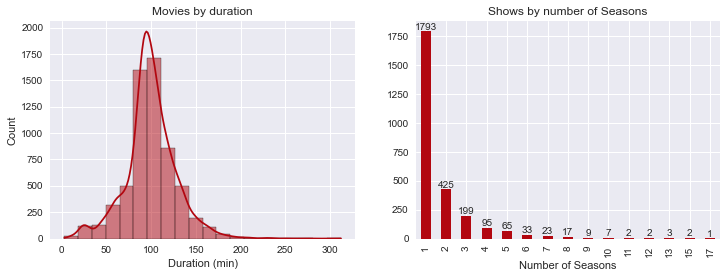

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axs

sns.histplot(movies['duration'], bins=20, ax=ax1, kde=True, color=palette['secondary'])
ax1.set_title('Movies by duration')
ax1.set_xlabel('Duration (min)')

shows.groupby('duration').count()['title'].plot(kind='bar', ax=ax2, color=palette['secondary'])
ax2.set_title('Shows by number of Seasons')
ax2.set_xlabel('Number of Seasons')

for container in ax2.containers:
    ax2.bar_label(container)

# Number of reviews per reviewer

In [9]:
reviews_per_reviewer = reviews.groupby('reviewer').count()['movie']
reviews_per_reviewer.describe()

count    478952.000000
mean          1.898844
std           8.166090
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1588.000000
Name: movie, dtype: float64

Reviewer with the most reviews

In [10]:
reviews_per_reviewer[reviews_per_reviewer == reviews_per_reviewer.max()]


reviewer
SnoopyStyle    1588
Name: movie, dtype: int64

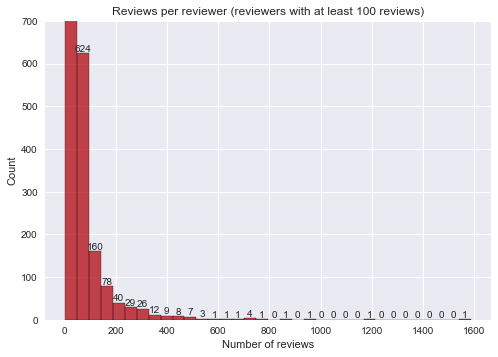

In [11]:
fig, ax = plt.subplots()

sns.histplot(reviews_per_reviewer, bins="doane", ax=ax, color=palette['secondary'])
ax.set_title('Reviews per reviewer (reviewers with at least 100 reviews)')
ax.set_xlabel('Number of reviews')
ax.set_ylim(0, 700)

for container in ax.containers:
    ax.bar_label(container)